In [60]:


import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [61]:
#  RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier  


from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split


###  Grid-search
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [65]:
data.head(10)

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
6,RT @warriorwoman91: I liked her and was happy ...,Negative
7,Going on #MSNBC Live with @ThomasARoberts arou...,Neutral
8,Deer in the headlights RT @lizzwinstead: Ben C...,Negative
9,RT @NancyOsborne180: Last night's debate prove...,Negative


In [3]:
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [4]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [89]:
data = data[data.sentiment != "Neutral"]

In [90]:
data.columns

Index(['text', 'sentiment'], dtype='object')

In [91]:
data.sentiment.value_counts()

Negative    8493
Positive    2236
Name: sentiment, dtype: int64

In [92]:
data.shape

(10729, 2)

In [93]:
data['text'].head(5)

1       ScottWalker: Didn't catch the full  GOPdeba...
3       RobGeorge: That Carly Fiorina is trending -...
4       DanScavino:  GOPDebate w/  realDonaldTrump ...
5       GregAbbott_TX:  TedCruz: "On my first day I...
6       warriorwoman91: I liked her and was happy w...
Name: text, dtype: object

In [94]:
data['text'] = data['text'].str.replace('RT', ' ')

In [95]:
data['text'].head(5)

1       ScottWalker: Didn't catch the full  GOPdeba...
3       RobGeorge: That Carly Fiorina is trending -...
4       DanScavino:  GOPDebate w/  realDonaldTrump ...
5       GregAbbott_TX:  TedCruz: "On my first day I...
6       warriorwoman91: I liked her and was happy w...
Name: text, dtype: object

In [96]:
data['text'] = data['text'].str.replace('@', ' ')

In [97]:
data['text'].head(5)

1       ScottWalker: Didn't catch the full  GOPdeba...
3       RobGeorge: That Carly Fiorina is trending -...
4       DanScavino:  GOPDebate w/  realDonaldTrump ...
5       GregAbbott_TX:  TedCruz: "On my first day I...
6       warriorwoman91: I liked her and was happy w...
Name: text, dtype: object

In [98]:
data['text'] = data['text'].str.replace('#', ' ')

In [99]:
data['text'].head(5)

1       ScottWalker: Didn't catch the full  GOPdeba...
3       RobGeorge: That Carly Fiorina is trending -...
4       DanScavino:  GOPDebate w/  realDonaldTrump ...
5       GregAbbott_TX:  TedCruz: "On my first day I...
6       warriorwoman91: I liked her and was happy w...
Name: text, dtype: object

In [100]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [101]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [79]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['text'])


In [80]:
X_tfidf

<13871x16123 sparse matrix of type '<class 'numpy.float64'>'
	with 150562 stored elements in Compressed Sparse Row format>

In [81]:
X_features =  pd.DataFrame(X_tfidf.toarray())
X_features.head() 

,0,1,2,3,4,5,6,7,8,9,...,16113,16114,16115,16116,16117,16118,16119,16120,16121,16122
0,0.077832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.117339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.064239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.125702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.131884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
X_features.shape

(13871, 16123)

In [149]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text, min_df=0.1)
X_tfidf = tfidf_vect.fit_transform(data['text'])
type(X_tfidf)

scipy.sparse.csr.csr_matrix

In [152]:
X_features.shape

(10729, 5)

In [150]:
X_features =  pd.DataFrame(X_tfidf.toarray())
X_features.head() 

,0,1,2,3,4
0,0.928486,0.0,0.371367,0.0,0.0
1,0.928486,0.0,0.371367,0.0,0.0
2,0.928486,0.0,0.371367,0.0,0.0
3,0.780891,0.0,0.624667,0.0,0.0
4,0.928486,0.0,0.371367,0.0,0.0


In [151]:
data.head()

,text,sentiment
1,ScottWalker: Didn't catch the full GOPdeba...,Positive
3,RobGeorge: That Carly Fiorina is trending -...,Positive
4,DanScavino: GOPDebate w/ realDonaldTrump ...,Positive
5,"GregAbbott_TX: TedCruz: ""On my first day I...",Positive
6,warriorwoman91: I liked her and was happy w...,Negative


In [121]:
#X, y

NameError: name 'X' is not defined

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['sentiment'], test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

8583 2146 8583 2146


In [154]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8583, 5)
(2146, 5)
(8583,)
(2146,)


In [155]:
rf = RandomForestClassifier(n_estimators=500, max_depth=12, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [156]:
y_pred = rf_model.predict(X_test)

In [157]:
y_pred_prob = rf_model.predict_proba(X_test)
print(y_pred_prob)

[[0.76927636 0.23072364]
 [0.30113569 0.69886431]
 [0.82528164 0.17471836]
 ...
 [0.90694077 0.09305923]
 [0.75681009 0.24318991]
 [0.76927636 0.23072364]]


In [158]:
print(confusion_matrix(y_test,y_pred)) 
print('---------------------------------------------------')
print(classification_report(y_test,y_pred))  
print('---------------------------------------------------')
print(accuracy_score(y_test, y_pred))  

[[1659   12]
 [ 443   32]]
---------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.79      0.99      0.88      1671
    Positive       0.73      0.07      0.12       475

    accuracy                           0.79      2146
   macro avg       0.76      0.53      0.50      2146
weighted avg       0.78      0.79      0.71      2146

---------------------------------------------------
0.787977632805219


In [143]:
y_pred_train = rf_model.predict(X_train)

In [159]:
print(confusion_matrix(y_train,y_pred_train)) 
print('---------------------------------------------------')
print(classification_report(y_train,y_pred_train))  
print('---------------------------------------------------')
print(accuracy_score(y_train,y_pred_train))  

[[6382  440]
 [1634  127]]
---------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.80      0.94      0.86      6822
    Positive       0.22      0.07      0.11      1761

    accuracy                           0.76      8583
   macro avg       0.51      0.50      0.48      8583
weighted avg       0.68      0.76      0.71      8583

---------------------------------------------------
0.7583595479436095


In [160]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
nb_model = model.fit(X_train, y_train)


y_pred = nb_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred)) 
print('---------------------------------------------------')
print(classification_report(y_test,y_pred))  
print('---------------------------------------------------')
print(accuracy_score(y_test, y_pred))  

[[1671    0]
 [ 475    0]]
---------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.78      1.00      0.88      1671
    Positive       0.00      0.00      0.00       475

    accuracy                           0.78      2146
   macro avg       0.39      0.50      0.44      2146
weighted avg       0.61      0.78      0.68      2146

---------------------------------------------------
0.7786579683131407


C:\Users\Sky\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
from xgboost import XGBClassifier
mdl_xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth =10)
mdl_xgb.fit(X_train, y_train)
y_pred = mdl_xgb.predict(X_test)

print(confusion_matrix(y_test,y_pred)) 
print('---------------------------------------------------')
print(classification_report(y_test,y_pred))  
print('---------------------------------------------------')
print(accuracy_score(y_test, y_pred)) 

[[1659   12]
 [ 443   32]]
---------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.79      0.99      0.88      1671
    Positive       0.73      0.07      0.12       475

    accuracy                           0.79      2146
   macro avg       0.76      0.53      0.50      2146
weighted avg       0.78      0.79      0.71      2146

---------------------------------------------------
0.787977632805219


In [147]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

As a next step I separated the Positive and Negative tweets of the training set in order to easily visualize their contained words.  After that I cleaned the text from hashtags, mentions  and links. Now they were ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.

Positive words


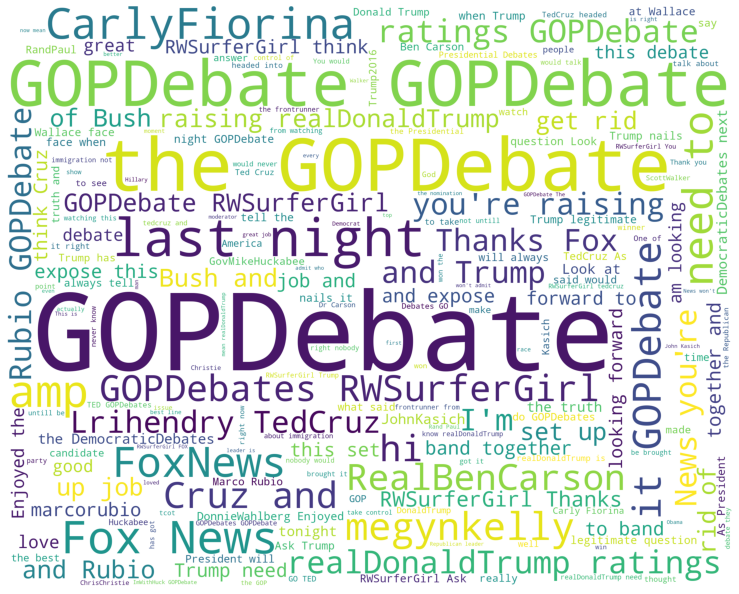

Negative words


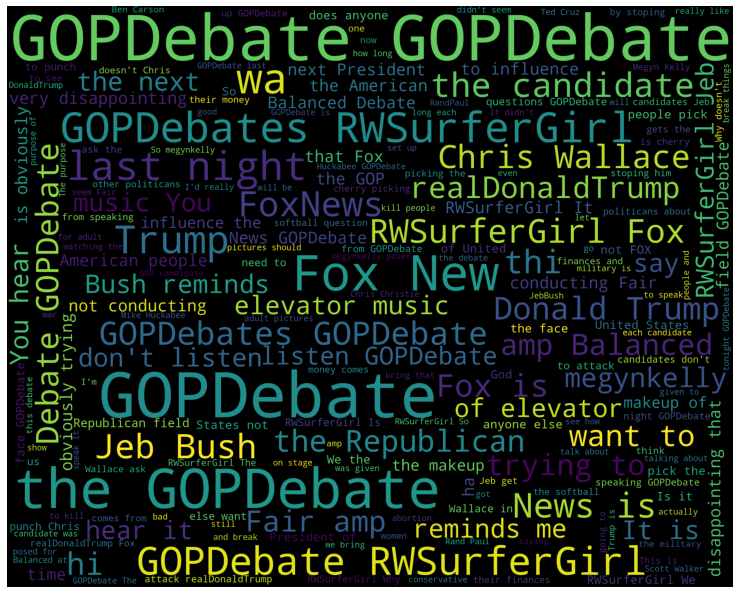

In [148]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

Interesting to notice the following words and expressions in the positive word set:
 **truth**, **strong**, **legitimate**,  **together**, **love**, **job**

In my interpretation, people tend to believe that their ideal candidate is truthful, legitimate, above good and bad.


----------


At the same time, negative tweets contains words like:
**influence**, **news**, **elevator music**, **disappointing**, **softball**, **makeup**, **cherry picking**, **trying**

In my understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking.

After the vizualization, I removed the hashtags, mentions, links and stopwords from the training set.

**Stop Word:** Stop Words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return vast amount of unnecessary information. ( the, for, this etc. )

In [13]:
                
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

As a next step I extracted the so called features with nltk lib, first by measuring a frequent distribution and by selecting the resulting keys.

In [14]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

Hereby I plotted the most frequently distributed words. The most words are centered around debate nights.

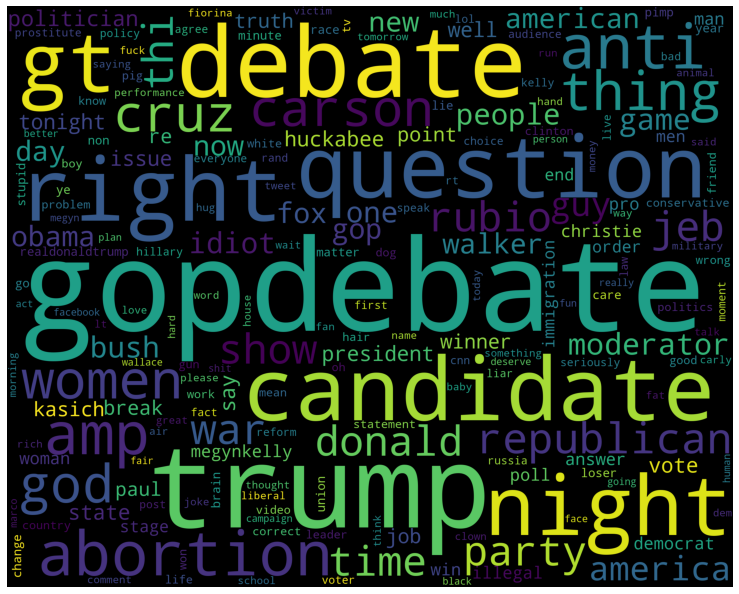

In [15]:
wordcloud_draw(w_features)